In [94]:
import numpy as np
from random import random as rand
import matplotlib.pyplot as plt
from time import time

In [106]:
# the distribution function
poisson = lambda xvals, lmbda: np.array([
    lmbda**x*np.exp(-lmbda)/np.math.factorial(x) for x in xvals])

In [133]:
# if we throw an n-sided die m times, we will find the die to land on side x on s of the m rolls. 
# if we do this many many times, the probability of s occurrences of the die having
# landed on side x in a given series of m rolls will obey a Poisson distribution. 
# below I simulate this for different numbers of throws m per measurement and plot the results.


# simulate dice throws
measurements = 10000
dice = 1
sides = 12
value = 6 # value of interest, i.e. "we rolled a 6"

throw_list = [5, 40, 100] # number of times to throw the die per measurement

labels = []

results = [] # the list of occurences for the measurements made

t_start = time()
for throws in throw_list:
    
    occurrences = np.empty(measurements)

    print(f"throwing {dice} {sides}-sided dice {throws} times, {measurements} times...")
    for i in range(measurements):

        rolls = np.array([sum([np.floor(sides*rand())+1 
                                   for i in range(dice)]) 
                                   for j in range(throws)])
        # count number of times we got the value of interest    
        occurrences[i] = np.count_nonzero(rolls==value)
    
    results.append(occurrences)
    
    # for making a plot legend
    labels.append(f"{dice} {sides}-sided dice, {throws} throws") 
    
print(f"simulation ran for {time()-t_start} seconds")

throwing 1 12-sided dice 5 times, 10000 times...
throwing 1 12-sided dice 40 times, 10000 times...
throwing 1 12-sided dice 100 times, 10000 times...
simulation ran for 6.989723205566406 seconds


<ipython-input-106-adb4e9032114>:3: DeprecationWarning: Using factorial() with floats is deprecated
  lmbda**x*np.exp(-lmbda)/np.math.factorial(x) for x in xvals])


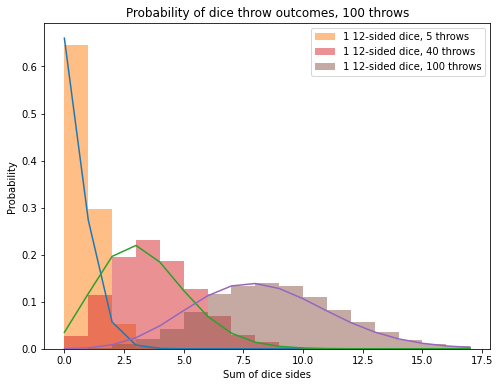

In [136]:
plt.figure(figsize=(8,6))
bins = np.arange(1.5*dice*sides) # the possibile outcomes for dice throws, 
                        #using the most recent values of dice, sides

curves = [poisson(bins,np.mean(s)) for s in results]

for curve,counts,label in zip(curves,results,labels):
    plt.plot(bins,curve)
    plt.hist(counts,label=label,bins=bins,density=True,alpha=0.5)

plt.title(f"Probability of dice throw outcomes, {throws} throws")
plt.xlabel("Sum of dice sides")
plt.ylabel("Probability")
plt.legend()